# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [24]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
%matplotlib inline

In [25]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [26]:
estimators = [('hc_ward', AgglomerativeClustering(n_clusters=3, linkage="ward")),
              ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage="complete")),
              ('hc_average', AgglomerativeClustering(n_clusters=3, linkage="average"))]

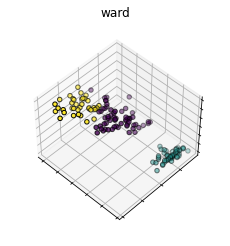

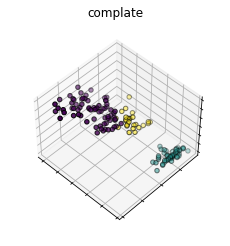

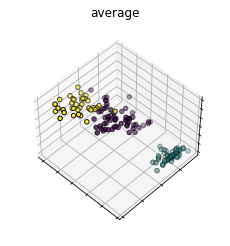

In [27]:
fignum = 1
titles = ['ward', 'complate', 'average']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134, auto_add_to_figure=False)
    fig.add_axes(ax)
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float64), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

In [28]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

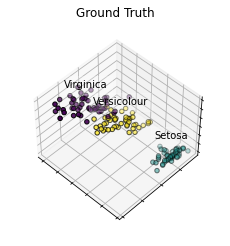

In [29]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134, auto_add_to_figure=False)
fig.add_axes(ax)
 
for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float64)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

Reference: https://www.it145.com/9/25795.html<br />
The following content is copied from [matplotlib 三維圖表繪製方法簡介](https://www.it145.com/9/25795.html)

 **1. 三維曲線圖繪製**

首先，我們來看一下三維曲線圖的繪製。

三維曲線圖的繪製和二維曲線圖的繪製方法極其相似，只是我們需要做以下兩點修改：

- 將畫布修改為三維座標系；
- 傳參時同時傳入x、y、z三個維度的座標訊號。

另外，plot函數需要修改三維曲線繪製的`Axes3D.plot`函數。

給出程式碼樣例如下：

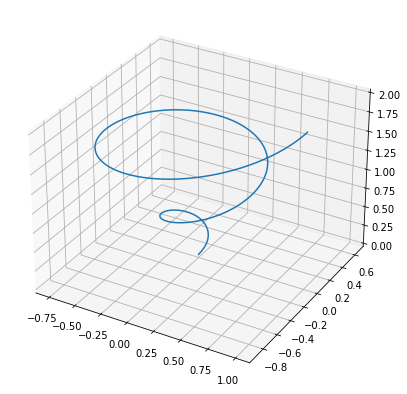

In [1]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

theta = numpy.linspace(0, 3.14*4, 200)
r = numpy.linspace(0, 1, 200)
x = r * numpy.cos(theta)
y = r * numpy.sin(theta)
z = numpy.linspace(0, 2, 200)

fig = plt.figure(figsize=(12, 7))
ax1 = plt.axes(projection='3d')
ax1.plot(x, y, z)
plt.show()

下面，我們來看一下三維空間中的散點圖繪製方法。

其方法其實挺簡單的，就是先繪製x、y面的網點座標，計算相應的z軸高度，而後建立一張三維圖，然後通過`Axes3D.scatter`函數進行散點圖繪製即可。

我們給出具體的程式碼樣例如下：

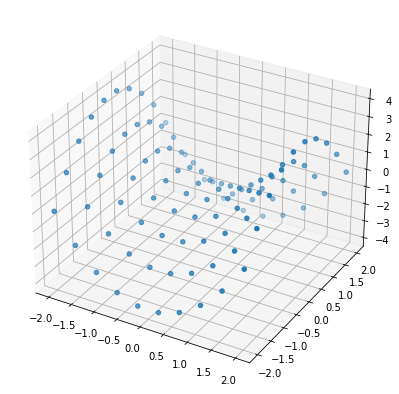

In [2]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = numpy.linspace(-2, 2, 10)
y = numpy.linspace(-2, 2, 10)
xx, yy = numpy.meshgrid(x, y)
z = xx ** 2 - yy ** 2

fig = plt.figure(figsize=(12, 7))
ax1 = plt.axes(projection='3d') # 建立三維座標軸
ax1.scatter(xx, yy, z) # 繪製三維散點圖
plt.show()

**3. 三維曲面圖繪製**

三維曲面圖的繪製與三維極其類似，只需要將`Axes3D.scatter`函數替換為`Axes3D.plot_surface`函數即可。

我們就不再多做解釋了，直接給出程式碼樣例如下：

(10, 10) (10, 10)


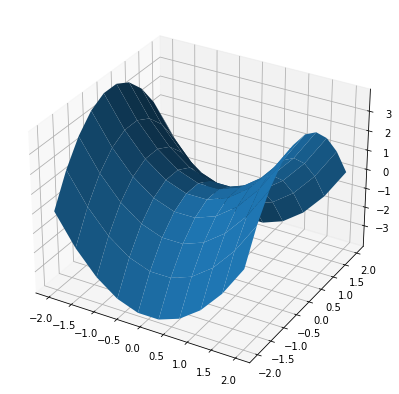

In [3]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = numpy.linspace(-2, 2, 10)
y = numpy.linspace(-2, 2, 10)
xx, yy = numpy.meshgrid(x, y)
print(xx.shape, yy.shape)
z = xx ** 2 - yy ** 2

fig = plt.figure(figsize=(12, 7))
ax1 = plt.axes(projection='3d') # 建立三維座標軸
ax1.plot_surface(xx, yy, z) # 繪製三維曲面圖
plt.show()